# Analyse des tweets concernant 5 livres

Dans ce notebook, nous allons analyser les données issues de Twitter que nous avons collectées concernant 5 livres afin d'étudier les mots qui sont employés pour décrire ces derniers. Les données que nous allons utiliser consistent en 5 datasets de 5000 tweets, chaque dataset concernant un livre différent parmi the Art of War, The song of Achille, Batman : the Dark Night Return, The Picture of Dorian Gray et The Book Thief.

On notera que les analyses réalisées ici concernent uniquement des tweets écrits en anglais.

In [1]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS

Le code ci-dessous affiche les nuages de mots correspondant aux données
passées en paramètre à la fonction make-tag_cloud.

In [2]:
# On télécharge les ressources nécessaires à NLTK et on initialise notre
# tokenizer
nltk.download("stopwords")
nltk.download("punkt")
tokenizer = RegexpTokenizer(r'\w+')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vincent/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vincent/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def make_tag_cloud(tokens, stopwords=[]):
    """
    Affiche un nuage des mots les plus courants (après avoir
    enlevé les stopwords)
    """
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                collocations=False,
                min_font_size = 10).generate(tokens)
                     
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 

De la même manière, on code une fonction qui affiche les bigrammes et trigrammes les plus fréquents pour chaque livre (un n-gramme est un enchaînement de n mots).

In [4]:
def get_n_grams(tokens):
    """
    Affiche les bigrammes et trigrammes les plus courants dans les données,
    triés par fréquence
    """
        
    bgs = nltk.bigrams(tokens)
    tgs = nltk.trigrams(tokens)
    
    n_grams = nltk.FreqDist(bgs).items() | nltk.FreqDist(tgs).items()
    n_grams_df = pd.DataFrame(n_grams, columns=["words sequences", "frequencies"])
    n_grams_df.sort_values(by=["frequencies"], ascending=False, inplace=True)
    print(n_grams_df.head(50))

In [5]:
def analyze_book_data(filepath, stopwords=[]):

    """
    filepath : chemin vers le fichier csv qui contient les tweets à analyser
    stopwords : stopwords additionnels qui peuvent être définis par l'utilisateur
    (mots à ignorer dans le nuage de mots)
    """

    # En plus des mots passés en paramètre, on ignore tous les mots composés d'une seule lettre et les
    # mots simples de l'anglais contenus dans les stopwords de NLTK
    stopwords.extend(["http", "https"])
    custom_stopwords = stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    stop_words = set(stop_words + list(STOPWORDS) + custom_stopwords + list(string.ascii_lowercase))

    # Tokenization de tout notre texte
    tweets = pd.read_csv(filepath, sep="|")["renderedContent"]
    tweets = tweets.str.lower()
    tweets = tweets.apply(lambda row: tokenizer.tokenize(row))
    tweets = tweets.sum()
    tweets_list = [t for t in tweets if t not in stop_words]
    tweets_str = " ".join(tweets_list)

    make_tag_cloud(tweets_str, stop_words)
    get_n_grams(tweets_list)

Voici les analyses qui ont été réalisées pour chacun des 5 livres. Pour chaque ouvrage, nous générons un nuage de mots afin de voir quels sont les mots couramment employés pour parler du livre et étudions les bigrammes et trigrammes utilisés par les utilisateurs de Twitter, toujours pour parler du livre.

## The Art of War

Voici le nuage de points généré pour l'Art de la Guerre, de Sun Tse.

                      words sequences  frequencies
8592                       (sun, tzu)         1148
74511                    (amazon, dp)          432
50533             (without, fighting)          140
12922                (enemy, without)          129
79127                 (subdue, enemy)          125
69962        (subdue, enemy, without)          122
28220               (supreme, subdue)          120
1439       (enemy, without, fighting)          120
31092        (supreme, subdue, enemy)          117
90664                   (know, enemy)           62
68006                       (tzu, co)           59
91365                  (sun, tzu, co)           59
29470                      (48, laws)           54
8090                  (fighting, sun)           52
18236        (without, fighting, sun)           52
94226            (fighting, sun, tzu)           52
24995                     (read, sun)           50
7887                    (laws, power)           48
33901               (48, laws, 

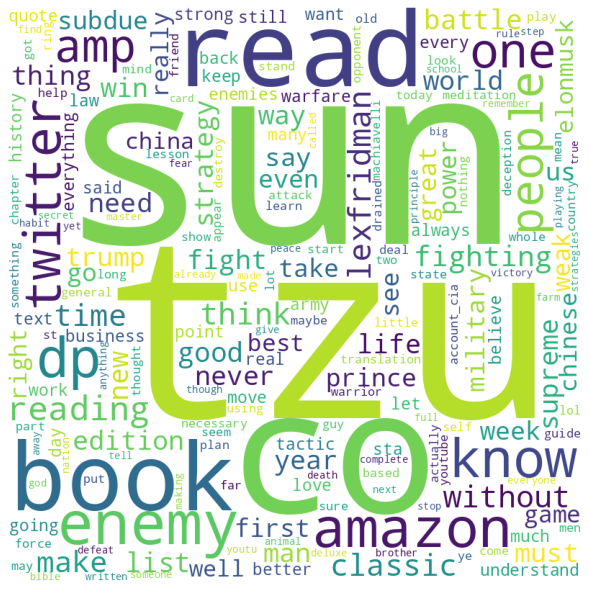

In [6]:
analyze_book_data("data/en/the_art_of_war.csv", stopwords=["art", "war"])

En plus du nom de l'auteur qui est logiquement très souvent cité, on constate que beaucoup d'utilisateurs sur Twitter font mention de notions évoquées dans le livre (gagner sans combattre, connaître son ennemi...). Il est aussi beaucoup fait mention d'Amazon DP. Après recherches, on remarque que DP est une abréviation de "Details of Product", qui est souvent utilisée dans les tweets qui font la promotion du livre sur Amazon.

## The Song of Achilles

                    words sequences  frequencies
76               (madeline, miller)          434
749                   (san, marino)          272
3905                    (le, chant)          121
3239                     (nyti, ms)          112
1166    (american, debut, novelist)          112
1984         (miller, wins, orange)          112
2213              (debut, novelist)          112
858        (madeline, miller, wins)          112
1298                 (miller, nyti)          112
3961      (orange, prize, american)          112
5542                   (ms, miller)          112
813               (american, debut)          112
181    (artsbeat, madeline, miller)          112
390                  (miller, wins)          112
112               (prize, american)          112
1679                 (wins, orange)          112
419                 (orange, prize)          112
4031                 (novelist, ms)          112
5680           (artsbeat, madeline)          112
3107         (noveli

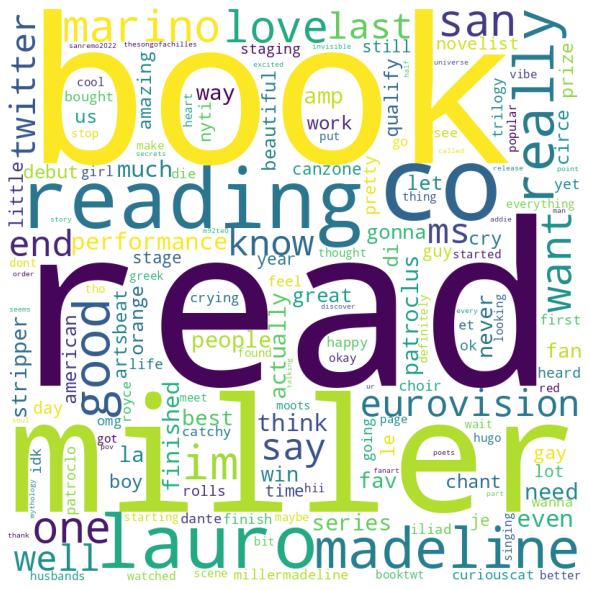

In [7]:
analyze_book_data("data/en/the_song_of_achille.csv", stopwords=["song", "achille", "achilles"])

En plus du nom de l'auteur, on remarque que beaucoup de mots (e.g. San Marino) concernent en fait des chansons d'un chanteur italien qui s'appelle aussi Achille. Dans ce cas, il serait intéressant de trouver un moyen d'identifier les tweets qui parlent du livre uniquement.

## Batman : the Dark Night Return

           words sequences  frequencies
27802        (night, part)          439
22633        (last, night)          377
26751            (part, 1)          344
6371        (night, rises)          318
14148            (part, 2)          310
8464           (year, one)          196
30851     (night, part, 1)          194
17741      (frank, miller)          167
2538      (night, part, 2)          162
9880       (begins, night)          162
19916       (night, night)          161
10034               (1, 2)          142
12442    (watching, night)          130
22927       (movie, night)          111
19105      (killing, joke)          106
10542       (vs, superman)          104
19117          (red, hood)           93
12176        (late, night)           92
25375    (animated, movie)           89
29145         (amp, robin)           88
4516     (justice, league)           87
4155     (long, halloween)           87
20428    (blackest, night)           86
28077             (1, amp)           76


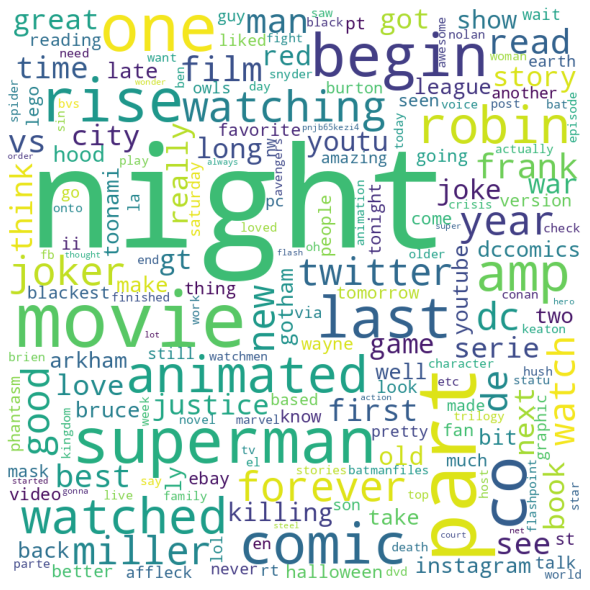

In [12]:
analyze_book_data("data/en/batman_the_dark_night_return.csv", stopwords=["batman", "dark", "knight", "return", "returns"])

Les résultats correspondent bien à ce à quoi on s'attend ici : la plupart des mots concernent des personnages de l'univers de Batman.

## The Picture of Dorian Gray

                  words sequences  frequencies
12306              (oscar, wilde)          954
65834                (amazon, dp)          335
32937          (angela, lansbury)          168
72681           (secret, history)           79
3315                  (wilde, co)           74
5122           (oscar, wilde, co)           72
37569     (manchurian, candidate)           63
14835   (oscar, wilde, goodreads)           57
3830              (murder, wrote)           57
79600          (wilde, goodreads)           57
88404            (song, achilles)           55
76255          (pride, prejudice)           54
73787                      (0, 0)           46
63027              (hangs, dusky)           45
40082        (moon, hangs, dusky)           45
42881           (honey, coloured)           45
74596        (look, great, honey)           45
42465       (air, waiting, charm)           45
77455     (honey, coloured, moon)           45
74032               (moon, hangs)           45
162        (w

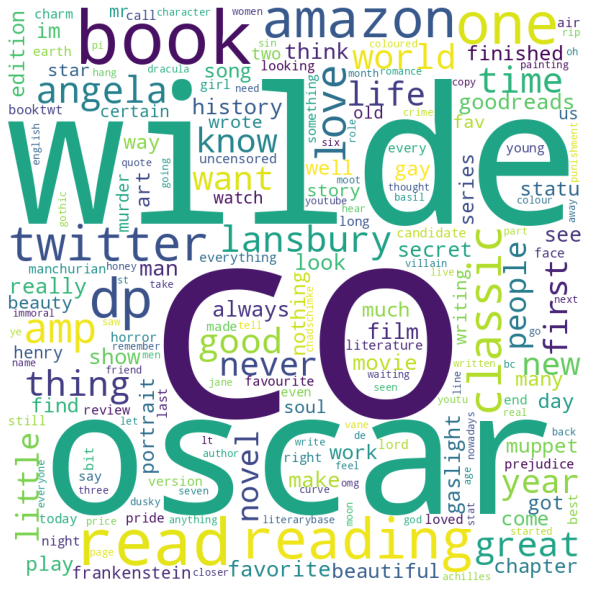

In [9]:
analyze_book_data("data/en/the_picture_of_dorian_gray.csv", stopwords=["picture", "dorian", "gray"])

On se retrouve ici confronté au même problème que pour the song of Achilles : beaucoup de résultats concernent un film basé sur le roman, et non le roman lui-même. Il pourrait être intéressant d'isoler les informations concernant le livre de celles concernant le film.

## The Book Thief

                     words sequences  frequencies
10034                (weekend, plan)         2298
6498          (weekend, plan, watch)          766
29224        (called, weekend, plan)          766
24459                  (plan, watch)          766
41579              (called, weekend)          766
35802                       (lt, gt)          765
4835                    (gt, listen)          565
44539               (lt, gt, listen)          565
27384                (markus, zusak)          550
59229                      (end, go)          495
66162               (songs, end, go)          495
5400                    (songs, end)          495
16787                  (read, named)          472
28792                  (movie, read)          472
67431                  (type, movie)          472
40485           (movie, read, named)          472
7316             (type, movie, read)          472
33088              (read, named, lt)          471
10091                    (named, lt)          471


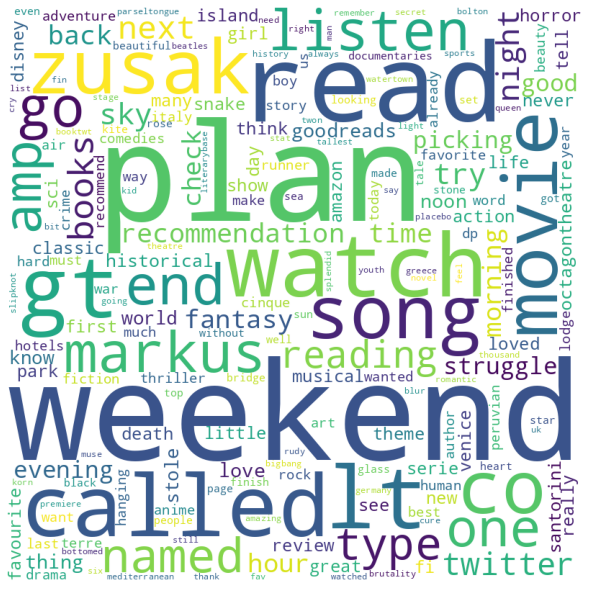

In [10]:
analyze_book_data("data/en/the_book_thief.csv", stopwords=["book", "thief"])

Ici encore, les résultats les plus fréquents concernent un film basé sur le livre, et non le livre lui-même.

Globalement, beaucoup de ces livres souffrent du même problème : les informations les concernant sont mélangées à des informations concernant des films du même nom, et il est difficile de les différencier.